<a href="https://colab.research.google.com/github/k4keshav-singh/House-Price-Prediction-/blob/main/Boston_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from keras.datasets import boston_housing
# Load dataset
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()
# Display dataset shape
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
# Feature Names (from Boston Housing dataset)
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
# Convert to Pandas DataFrame for visualization
df = pd.DataFrame(train_data, columns=feature_names)
df["Price"] = train_labels  # Add price column
# Display first 5 rows
print(df.head())

Training Data Shape: (404, 13)
Test Data Shape: (102, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
1  0.02177  82.5   2.03   0.0  0.415  7.610   15.7  6.2700   2.0  348.0   
2  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
3  0.03961   0.0   5.19   0.0  0.515  6.037   34.5  5.9853   5.0  224.0   
4  3.69311   0.0  18.10   0.0  0.713  6.376   88.4  2.5671  24.0  666.0   

   PTRATIO       B  LSTAT  Price  
0     21.0  396.90  18.72   15.2  
1     14.7  395.38   3.11   42.3  
2     20.2  375.52   3.26   50.0  
3     20.2  396.90   8.01   21.1  
4     20.2  391.43  14.65   17.7  


In [ ]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
# Build the updated model with regularization and dropout
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(train_data.shape[1],)),
    keras.layers.Dropout(0.3),  # Drops 30% of neurons randomly
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])
# Compile the model with a reduced learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
# Display updated model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Apply early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the updated model
history = model.fit(train_data, train_labels,epochs=150,
    validation_data=(test_data, test_labels),batch_size=16,
    callbacks=[early_stopping])

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 539.7058 - mae: 21.3578 - val_loss: 473.5198 - val_mae: 19.8712
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 340.1089 - mae: 16.3699 - val_loss: 106.9121 - val_mae: 8.5547
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.3252 - mae: 7.7047 - val_loss: 44.7987 - val_mae: 5.2761
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.4620 - mae: 5.2620 - val_loss: 30.2028 - val_mae: 4.1730
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.0035 - mae: 4.9317 - val_loss: 29.5107 - val_mae: 3.9579
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.0596 - mae: 4.6104 - val_loss: 27.3940 - val_mae: 3.6767
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.2438 - mae: 4.5673 - val_loss: 25.7630 - val_mae: 3.5331
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.4743 - mae: 4.1005 - val_loss: 25.6423 - val_mae: 3.5131
Epoch 9/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(test_data, test_labels)
print("\nUpdated Model Mean Absolute Error:", test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 19.9082 - mae: 3.1964 

Updated Model Mean Absolute Error: 3.359995126724243


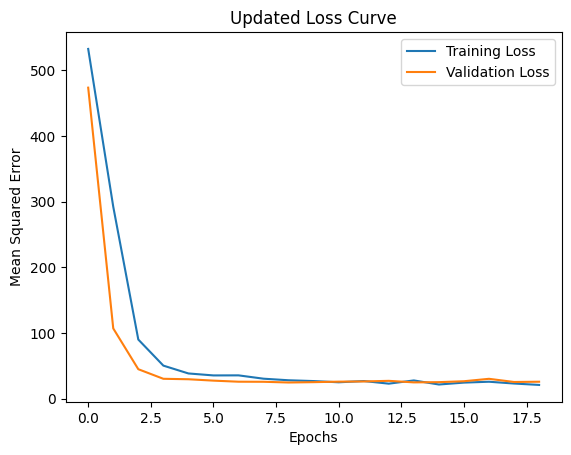

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Loss Curve')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


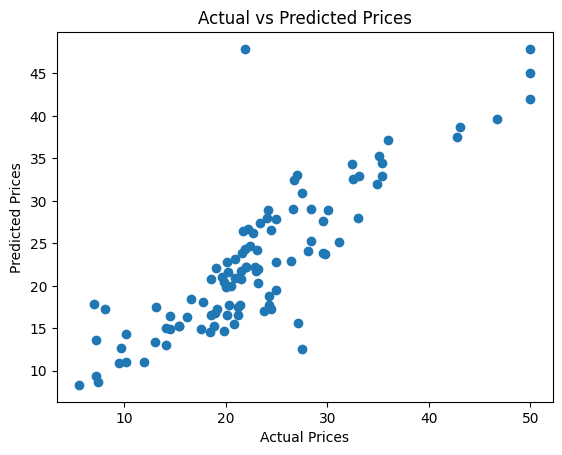

In [ ]:
# Predict on test data
predictions = model.predict(test_data)
# Compare actual vs. predicted prices
plt.scatter(test_labels, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
# Get actual house prices from the test set
y_actual = test_labels
# Get predicted house prices from the model
y_predicted = model.predict(test_data).flatten()
# Compute R² Score
r2 = r2_score(y_actual, y_predicted)
print("Updated Model R² Score:", r2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
Updated Model R² Score: 0.7199552241089018
